/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



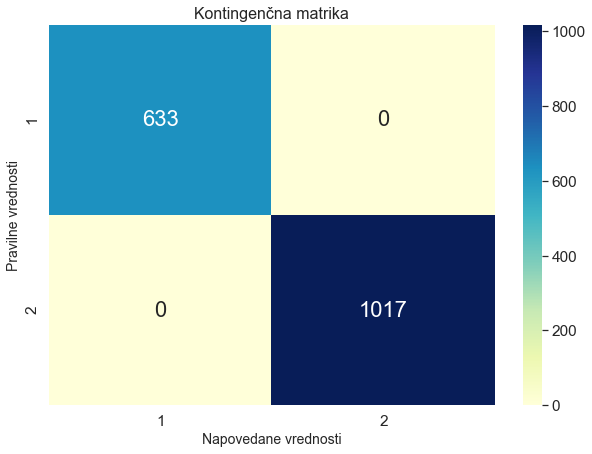


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6712797139728145

Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



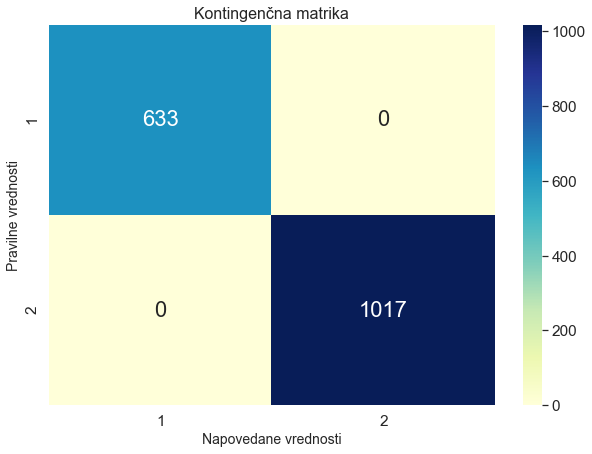


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6621715246379096

Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



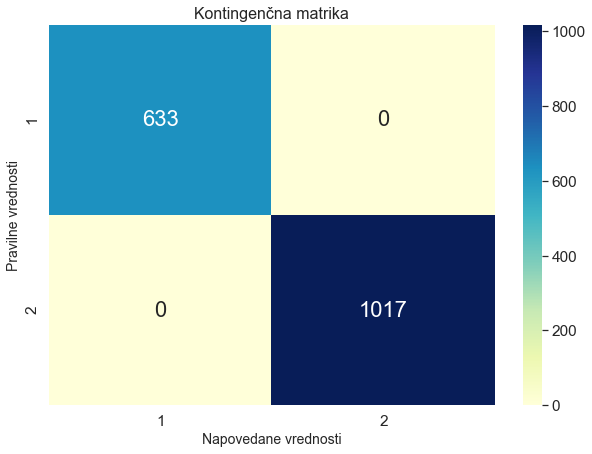


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.664862507186899

Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



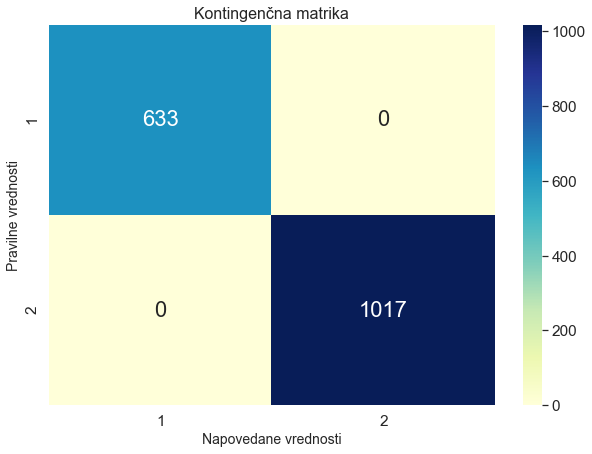


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6680567959427784

Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



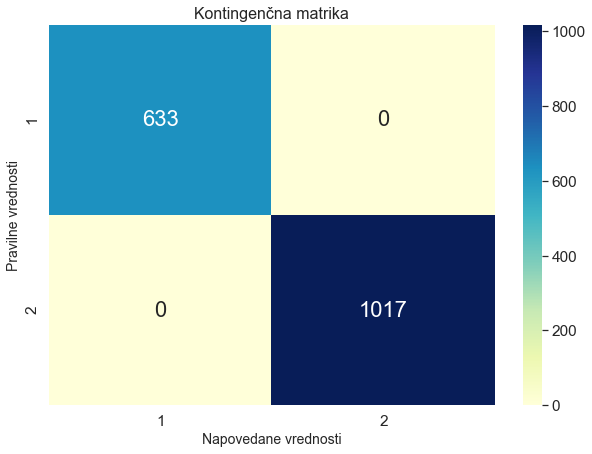


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6777685753853057

Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



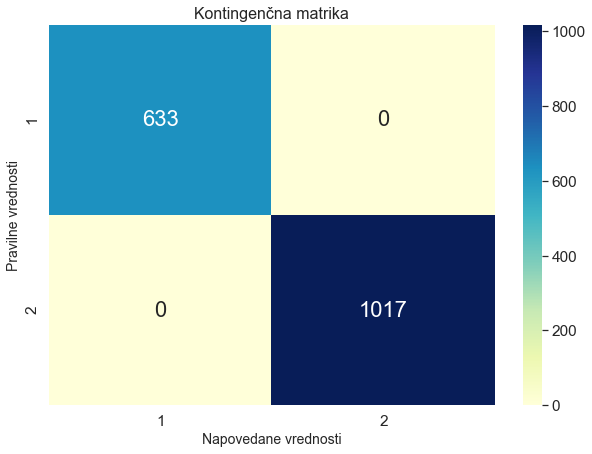


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6462781646340681

Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



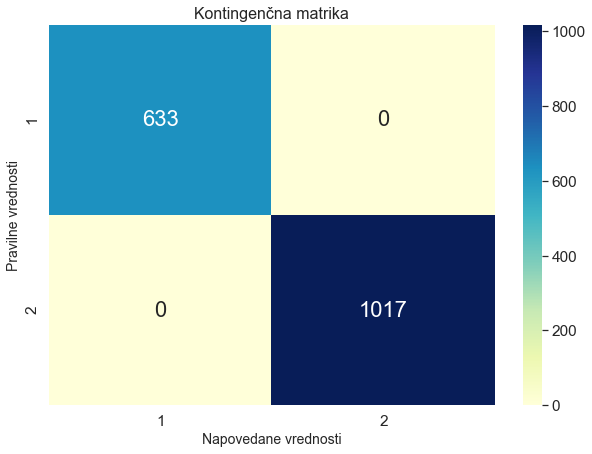


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6663052126376305

Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



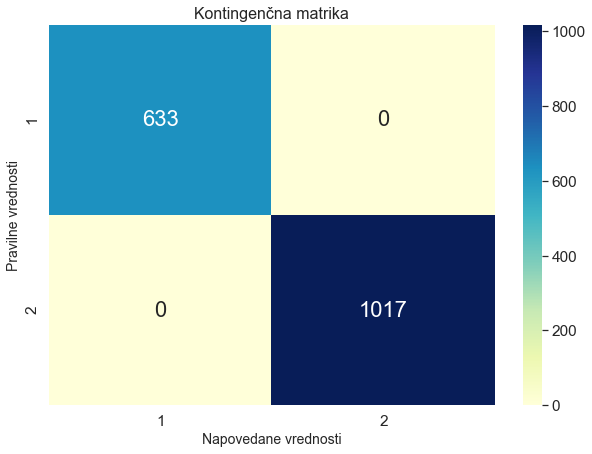


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6752143184346574

Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



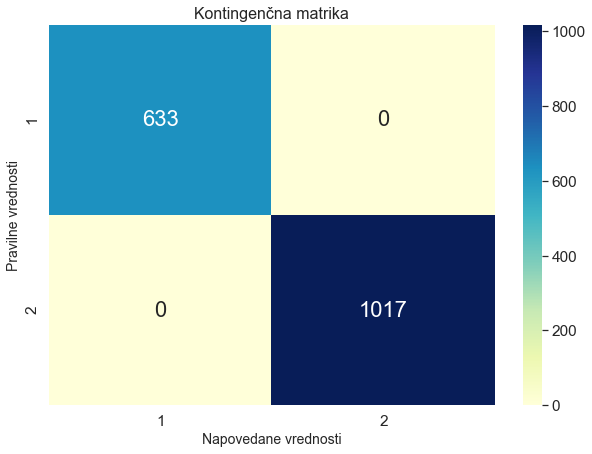


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6835698304286386

Preselection

(3000, 2048)
-
2285
0.7616666666666667
-
-
2227
0.9746161000571382
-
-
2223
0.9982036594317251
-
-
2219
0.9982006297795771
-
Object selection: knn

Draw object selection results

Classification Accuracy
1.0



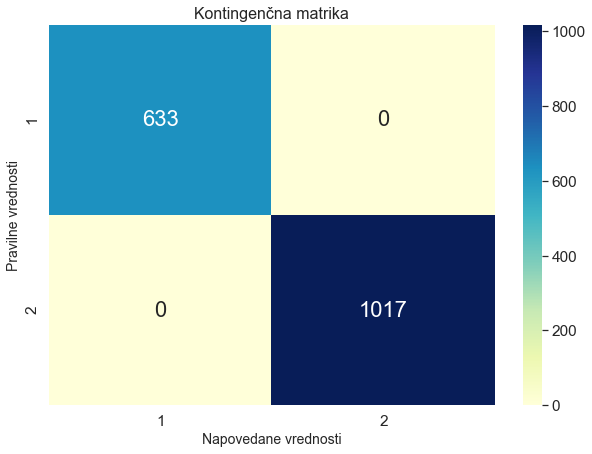


Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6677536834828914


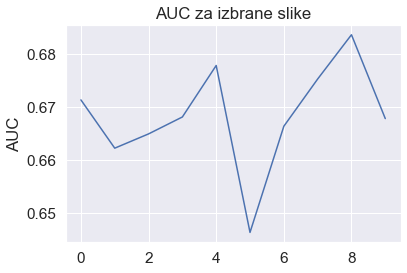

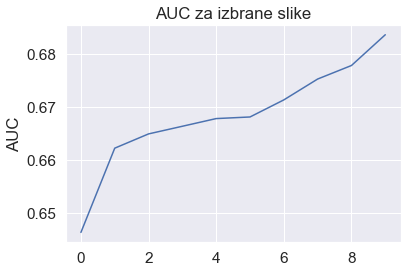

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt

# Parameters
data_directory = '../../data/generated-data-nr-2-n-8-2/'
features_path = '../../data/features-generated-data-nr-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
rating_thresholds = [1, 2]
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]
rating_thresholds = [1, 2]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds)

features = get_features(features_path, name_vector)

cv_results_file = '../results/cv-generated-data-r-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=True, selection_algorithm='knn')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6406394896555532
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6647484001657382
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6514271891630382
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6483526583130237
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6537201516056943
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.672747825091575
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6541890161169652
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1000, 32)

auc: 0.6544551609606541
Object selection: random

Dfmf

Parameters

12 12 2 2

(1000, 300)
(300, 2048)
(1

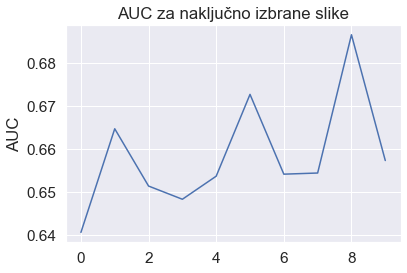

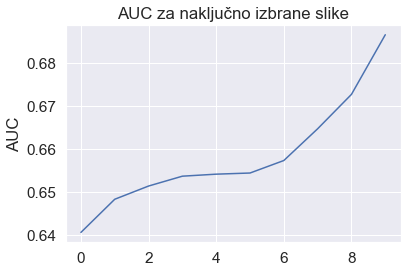

In [2]:
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za naključno izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za naključno izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()